In [10]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
f = open('wdbc.pkl','rb')
data = pickle.load(f)
data

,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
data_drop = data.drop(["id"], axis = 1)
data_malignant = data.iloc[:,1]
data_mean = data_drop.iloc[ : , : 11]
data_standard_deviation1 = data_drop.iloc[ : , 11: 21]
data_standard_deviation = pd.concat([data_malignant, data_standard_deviation1], axis = 1)
data_worst_value1 = data_drop.iloc[ : , 21: ]
data_worst_value = pd.concat([data_malignant, data_worst_value1], axis = 1)

In [4]:
data_worst_value 

,malignant,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,1,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...
564,1,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
benign = (data['malignant'] == 0).sum()
malignant = (data['malignant'] == 1).sum()

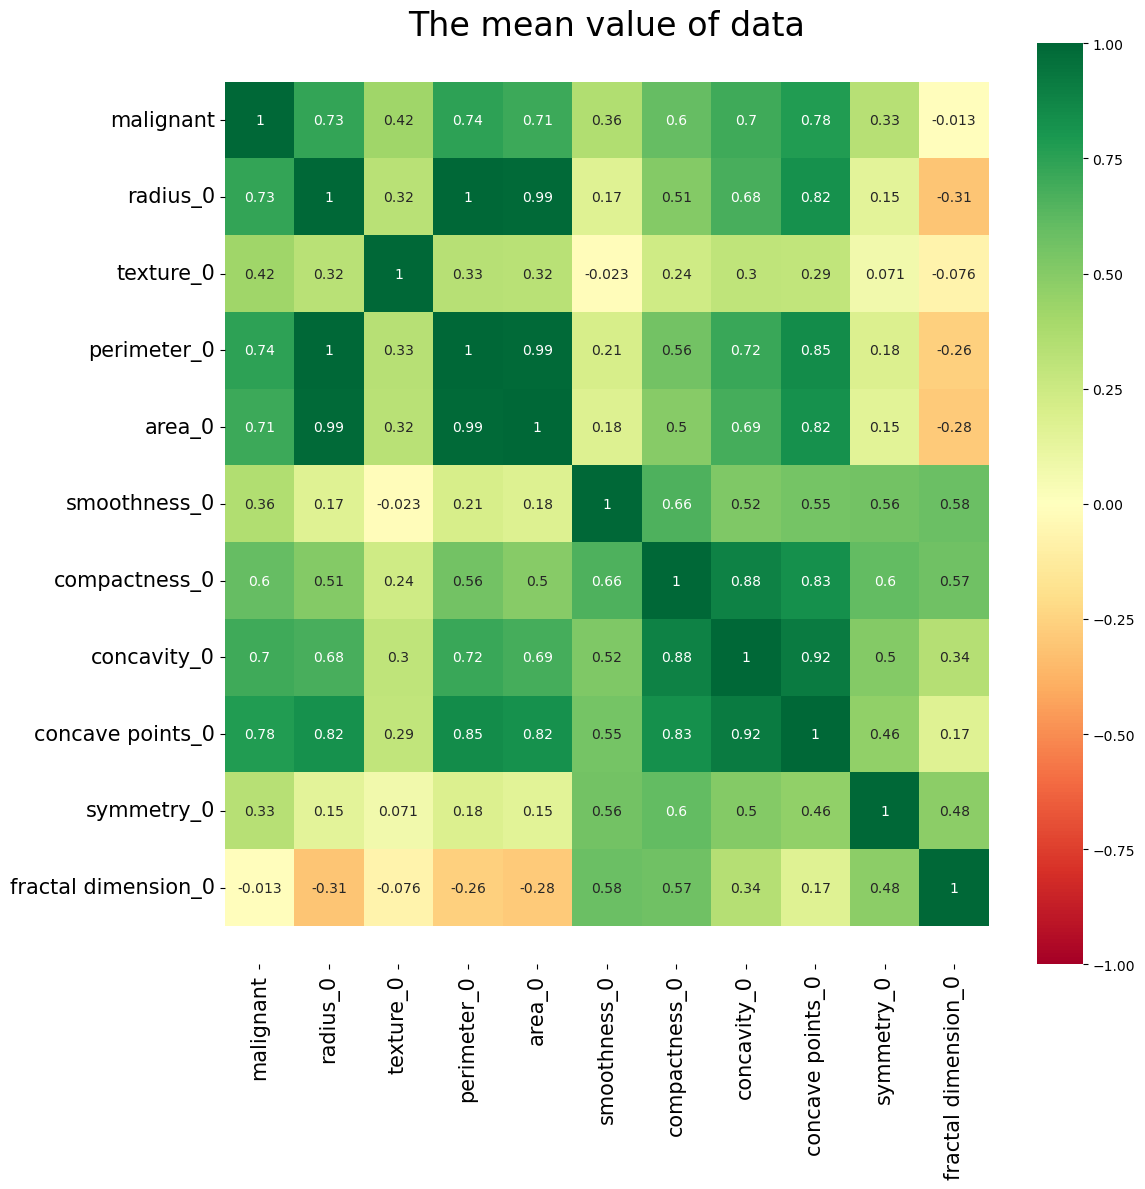

In [6]:
# show correlation between features

plt.figure(figsize=(12, 12))
ax = sns.heatmap(data_mean.corr(), 
                 xticklabels=data_mean.corr().columns, 
                 yticklabels=data_mean.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('The mean value of data', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("correlogram.png")
plt.show()
plt.close()

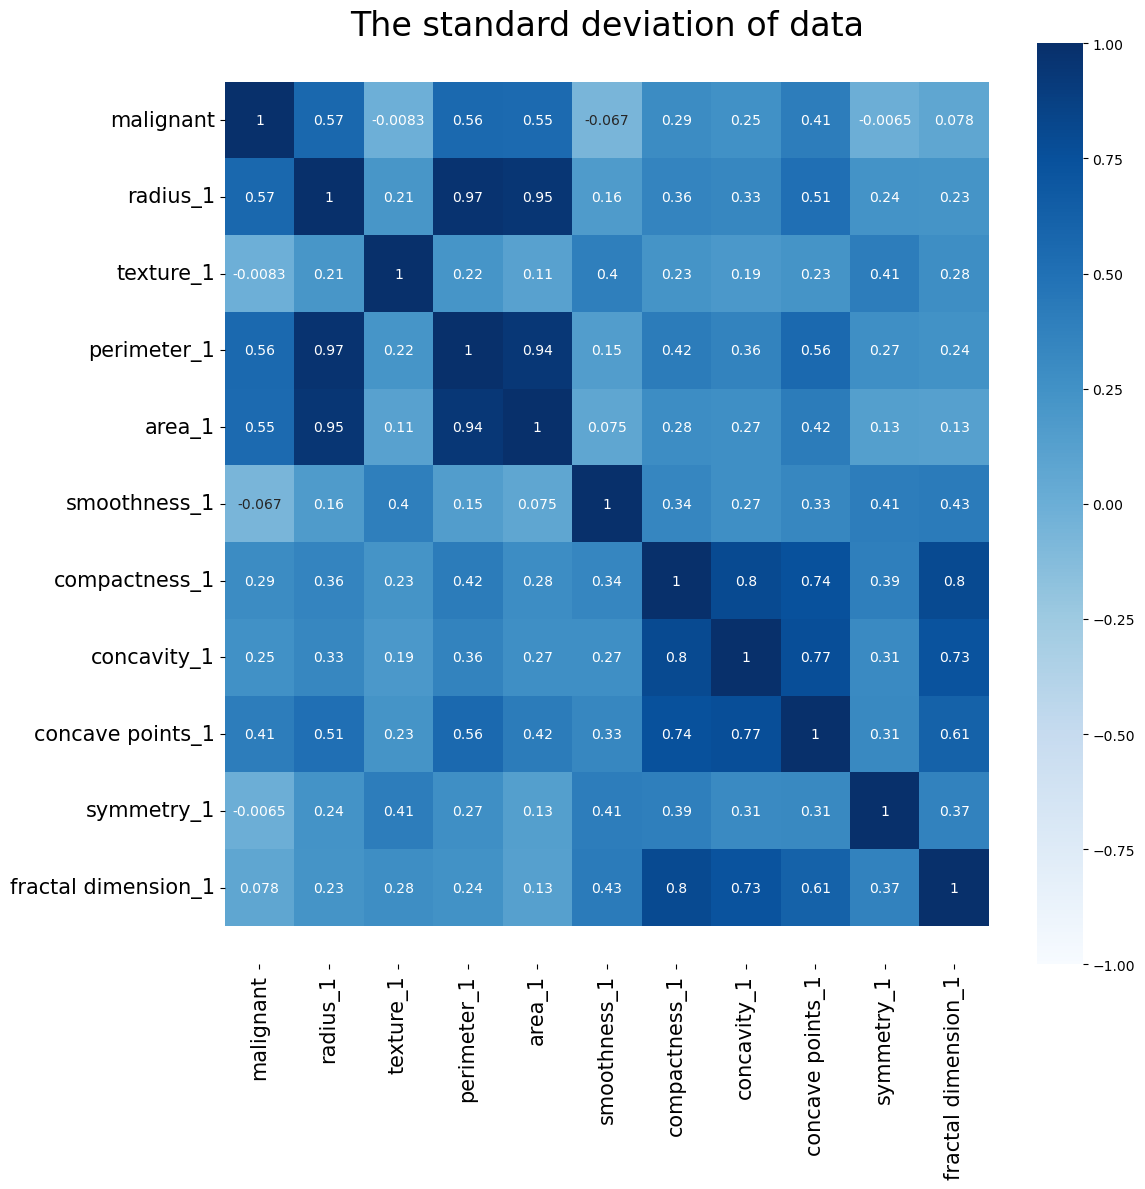

In [7]:
# show correlation between features

plt.figure(figsize=(12, 12))
ax = sns.heatmap(data_standard_deviation.corr(), 
                 xticklabels=data_standard_deviation.corr().columns, 
                 yticklabels=data_standard_deviation.corr().columns, 
                 cmap='Blues', 
                 center=0, 
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('The standard deviation of data', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("correlogram.png")
plt.show()
plt.close()
     

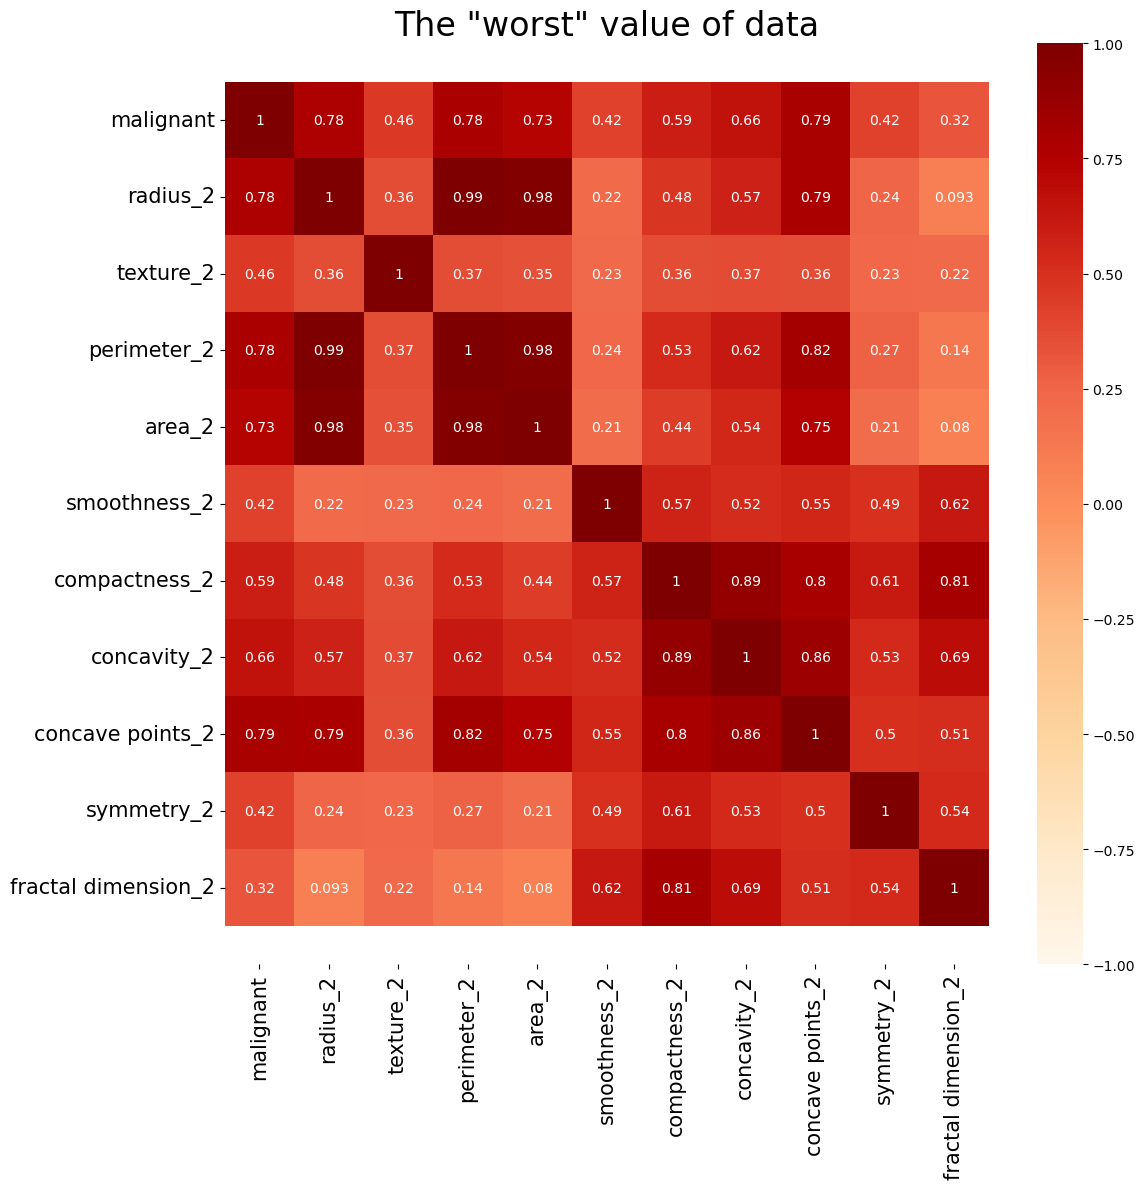

In [8]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(data_worst_value.corr(), 
                 xticklabels=data_worst_value.corr().columns, 
                 yticklabels=data_worst_value.corr().columns, 
                 cmap='OrRd', 
                 center=0, 
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('The "worst" value of data', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("correlogram.png")
plt.show()
plt.close()

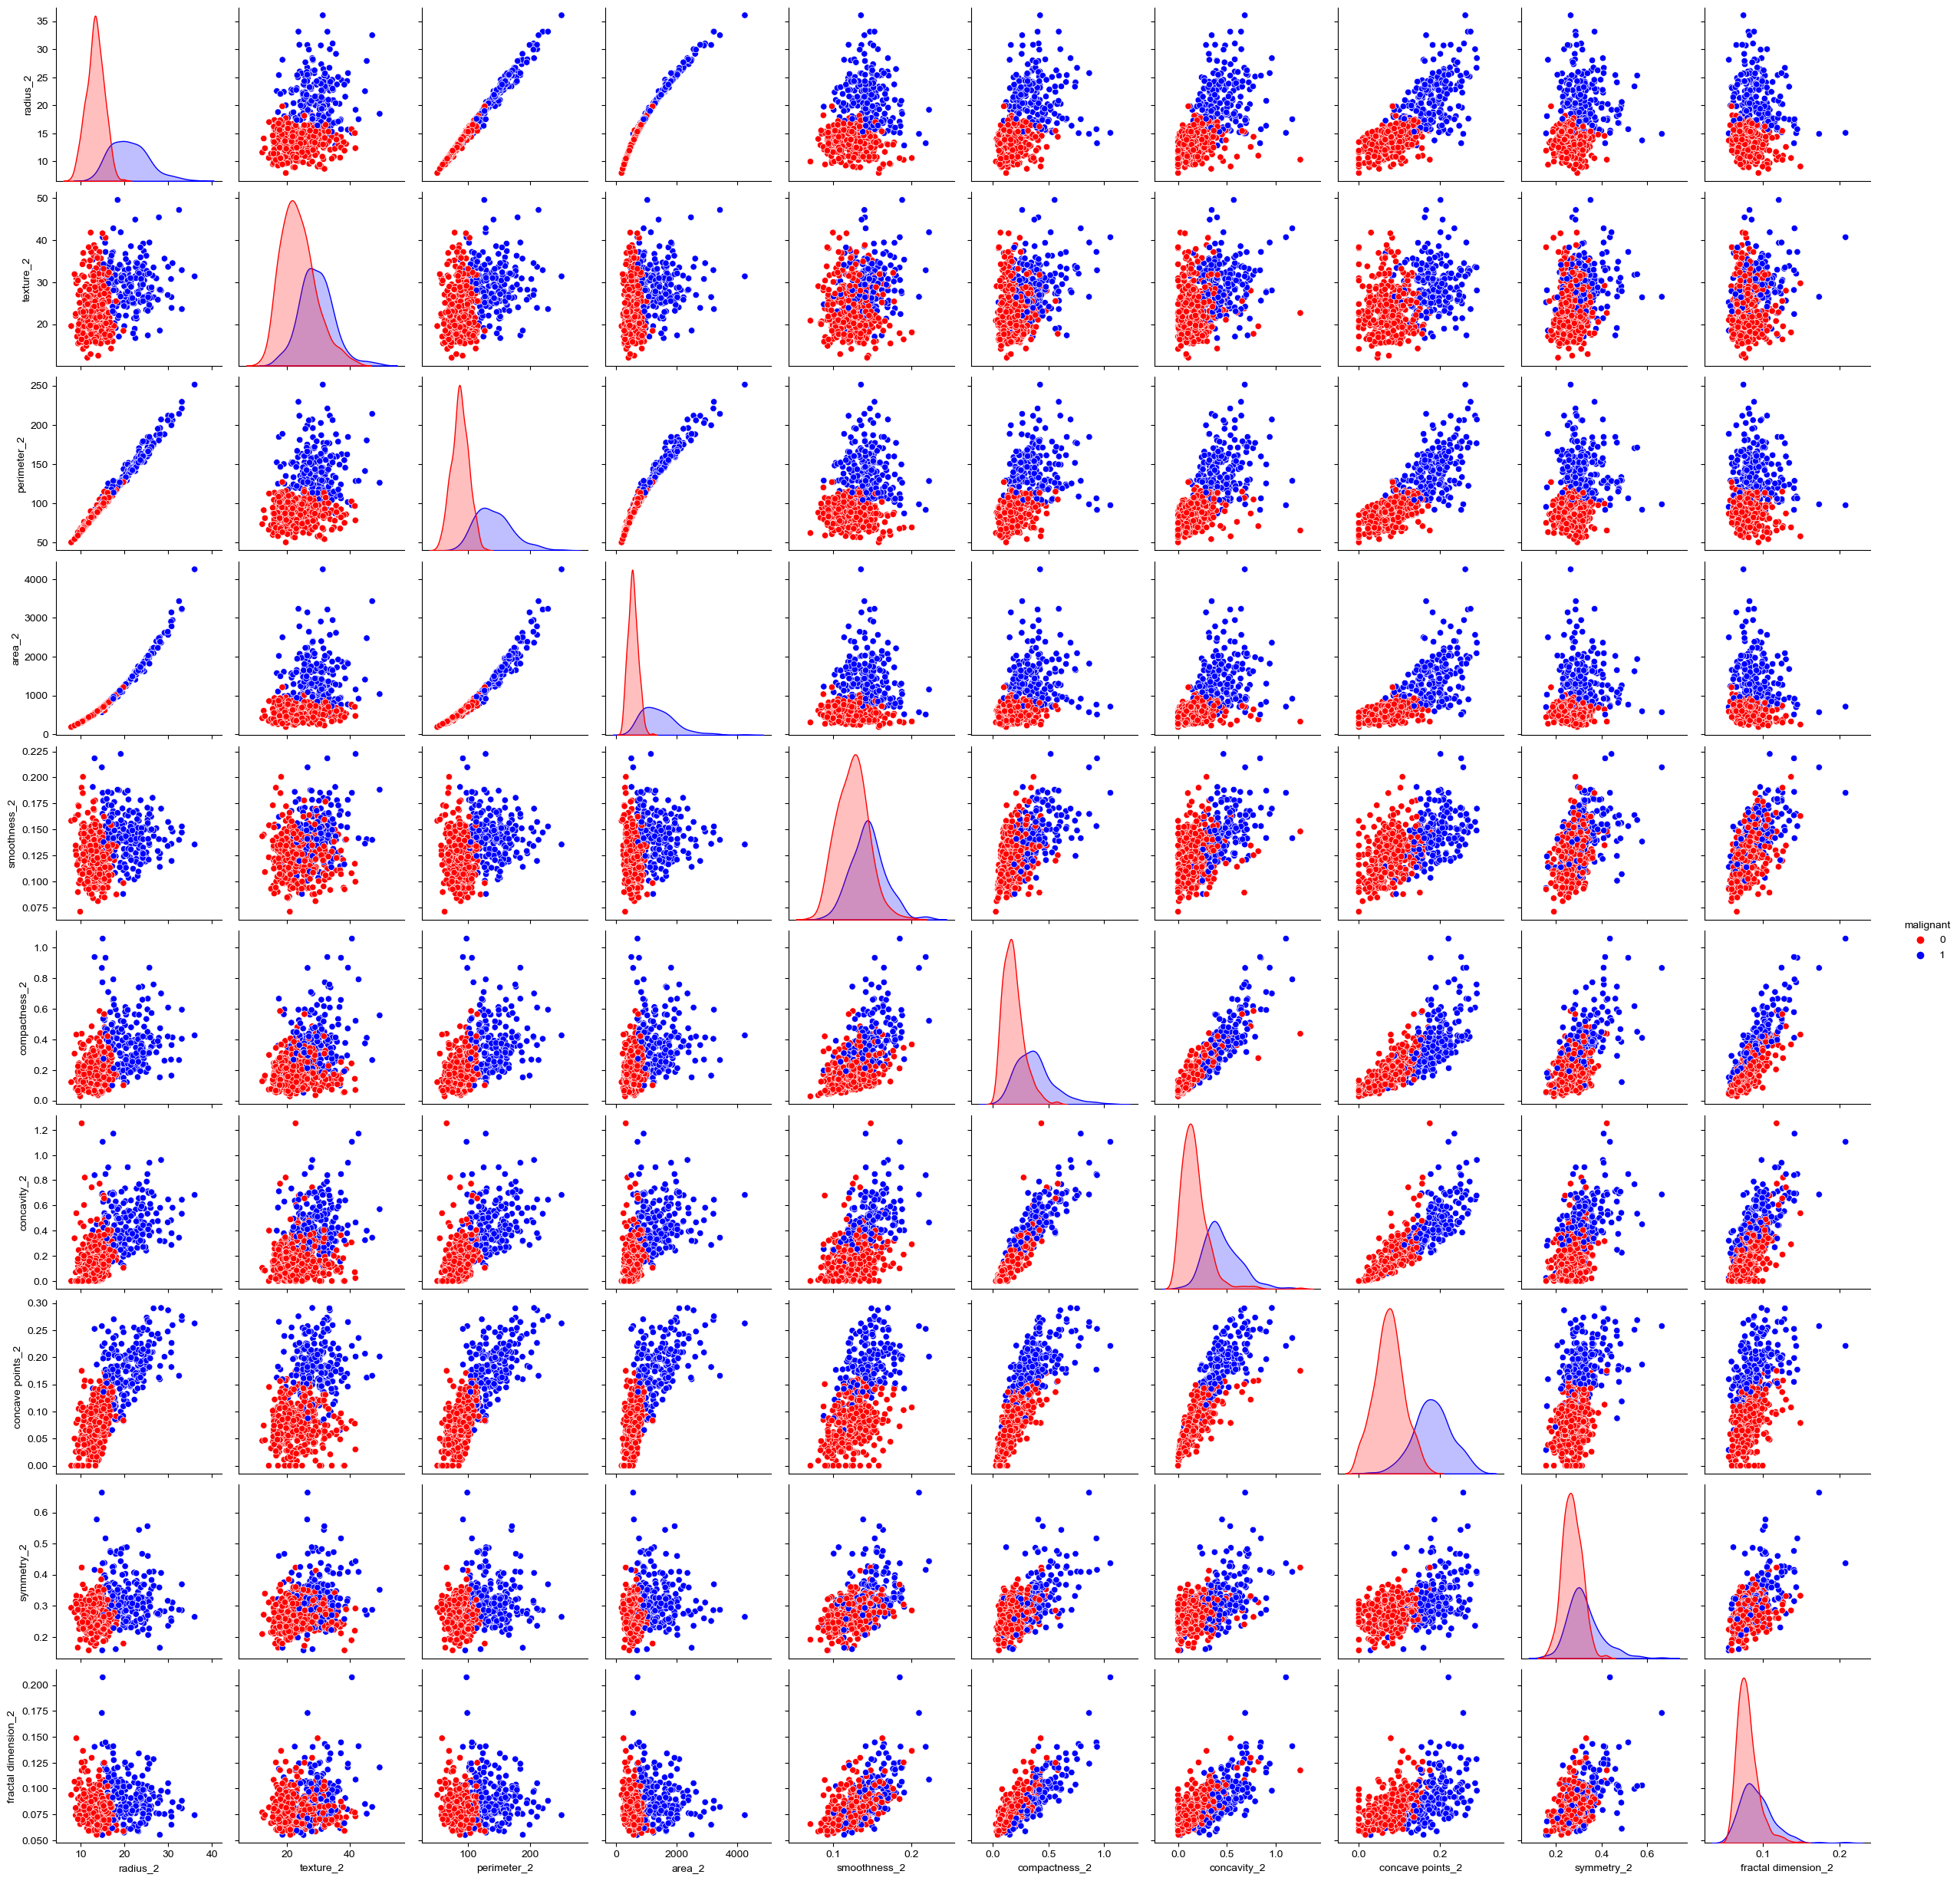

In [9]:
sns.pairplot(data_worst_value, palette=("r", "b"), hue="malignant")
sns.set(rc={'figure.figsize':(35,35)})

mean texture

the worst area

the worst smoothness

In [10]:
mean_texture = data_drop.iloc[:,0]
mean_texture

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: malignant, Length: 569, dtype: int32

### Rule-based classifier

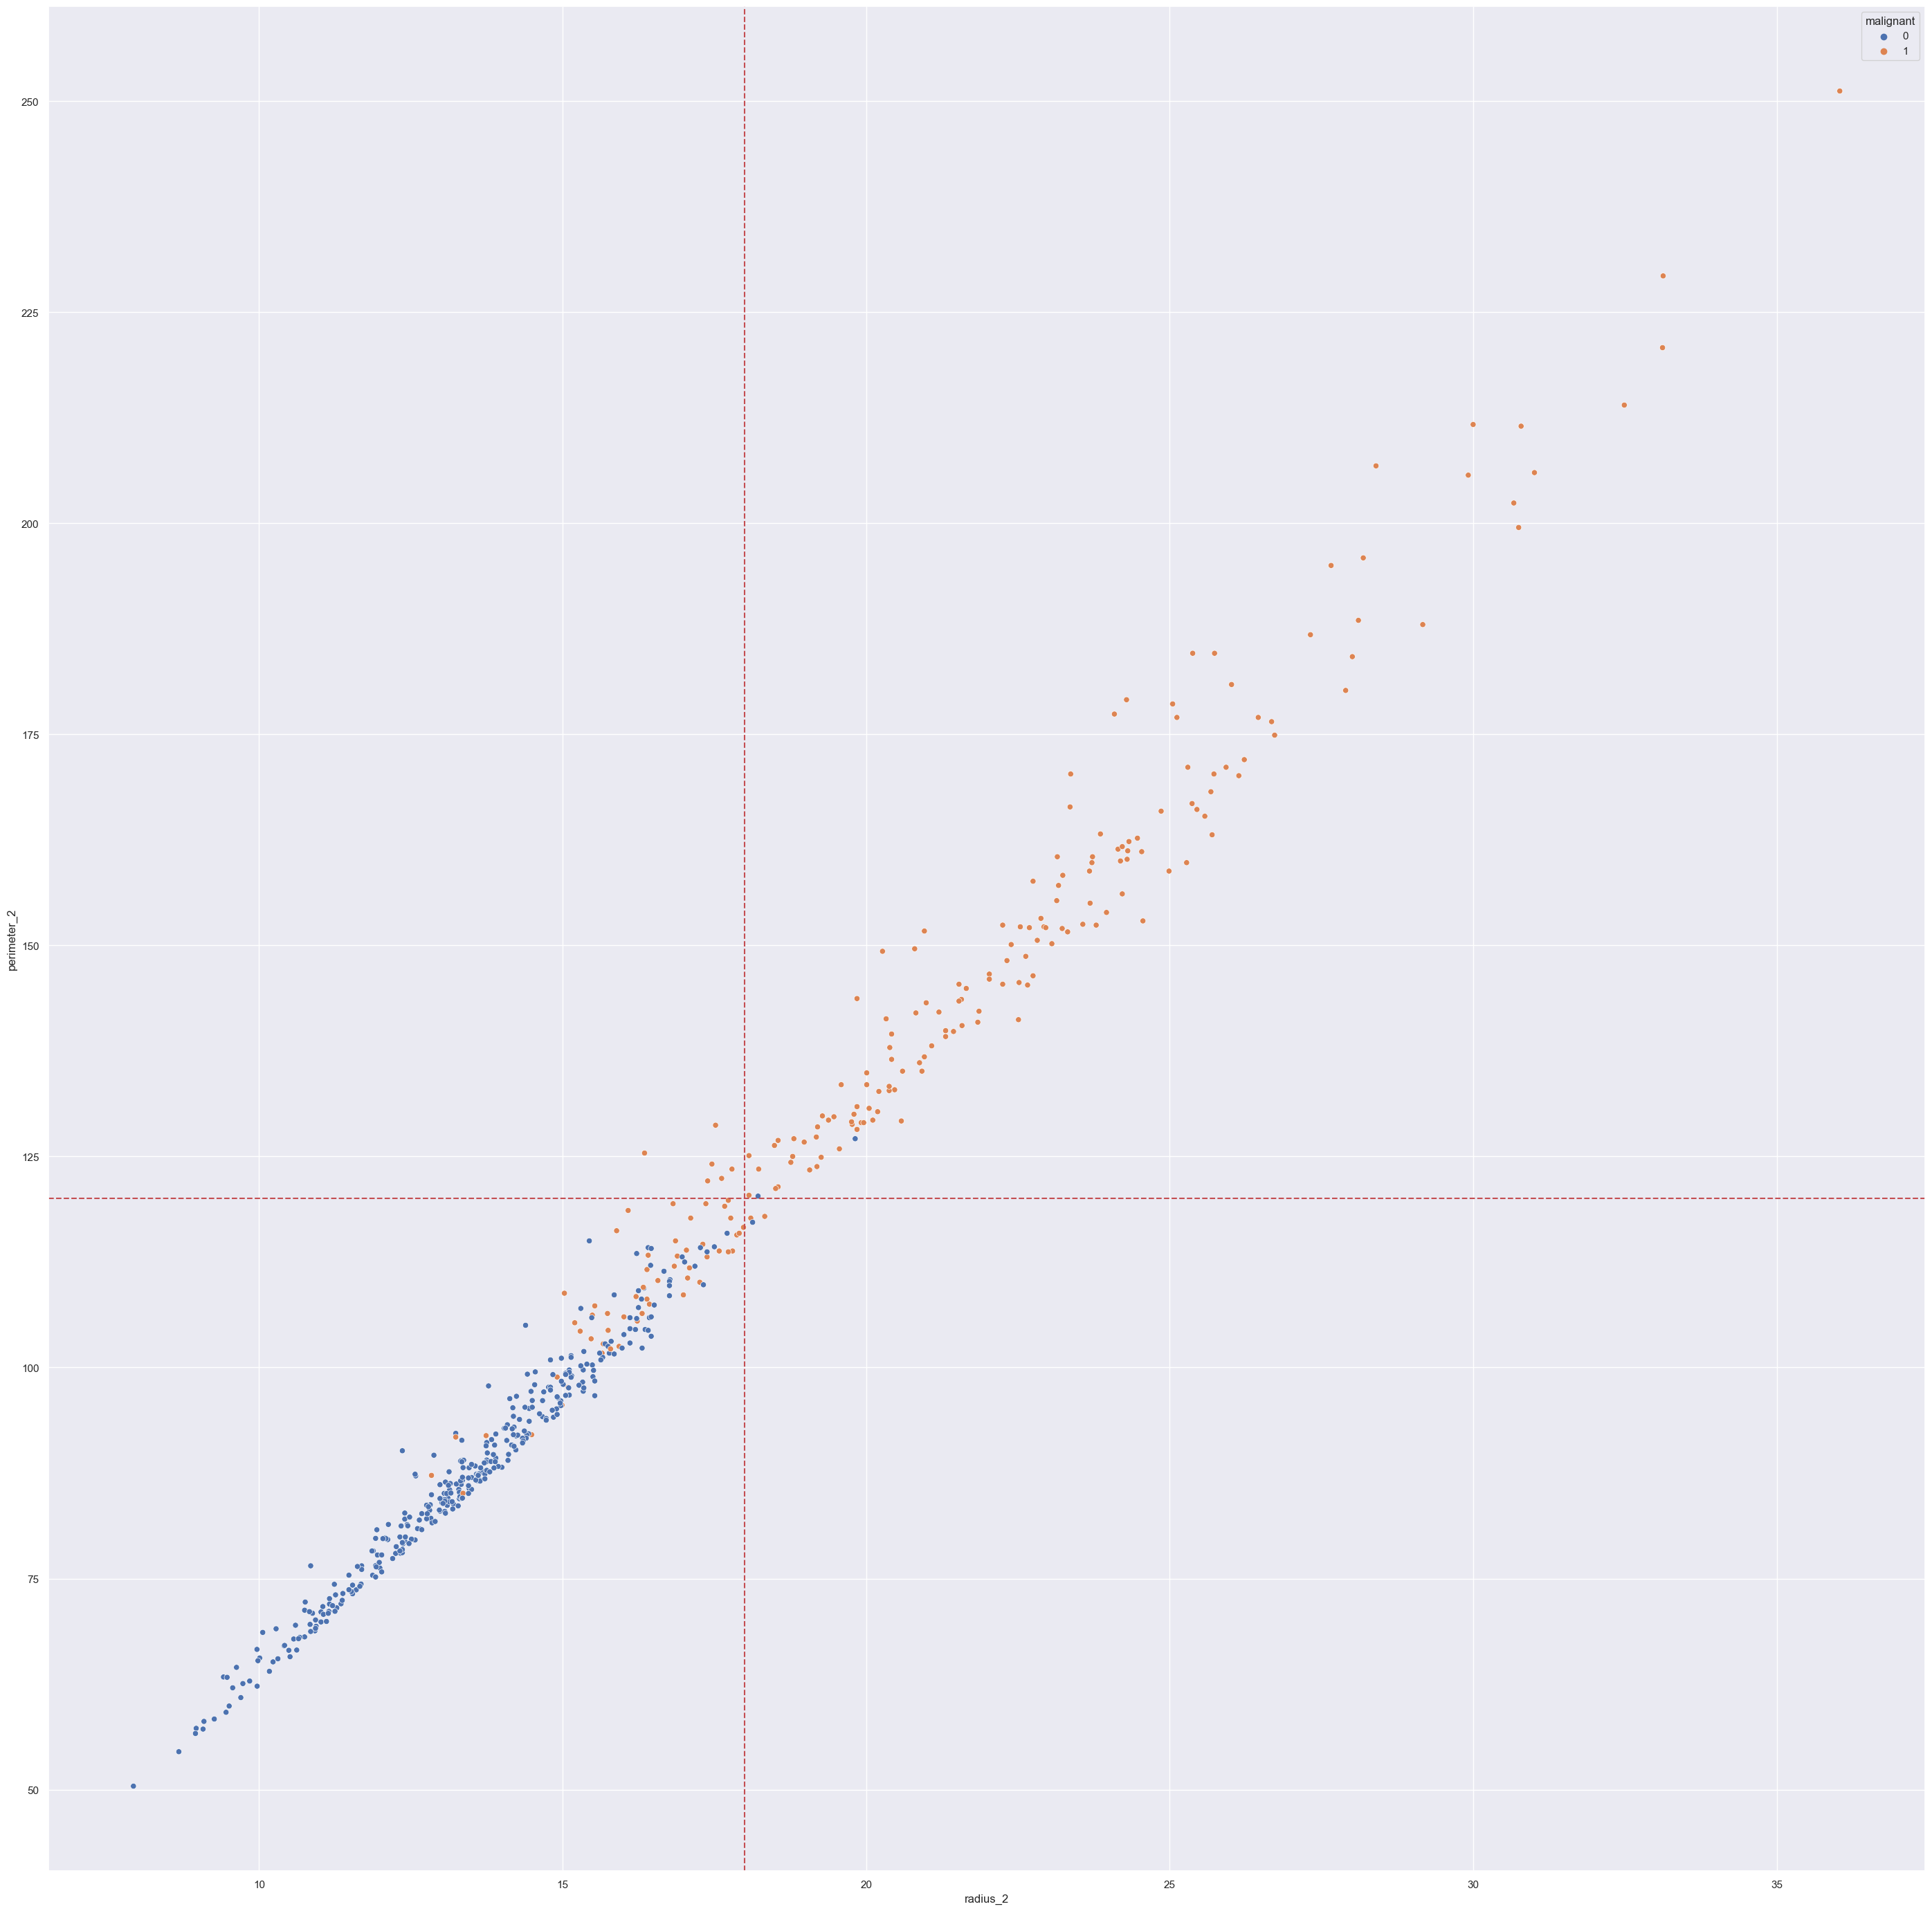

In [11]:
# decision threshold for rule based classifier
import seaborn as sns
radius_plt = sns.scatterplot(data=data_drop, x="radius_2", y="perimeter_2", hue="malignant")
radius_plt.axvline(18, color="r", linestyle="--")
radius_plt.axhline(120, color="r", linestyle="--")
fig = radius_plt.get_figure()

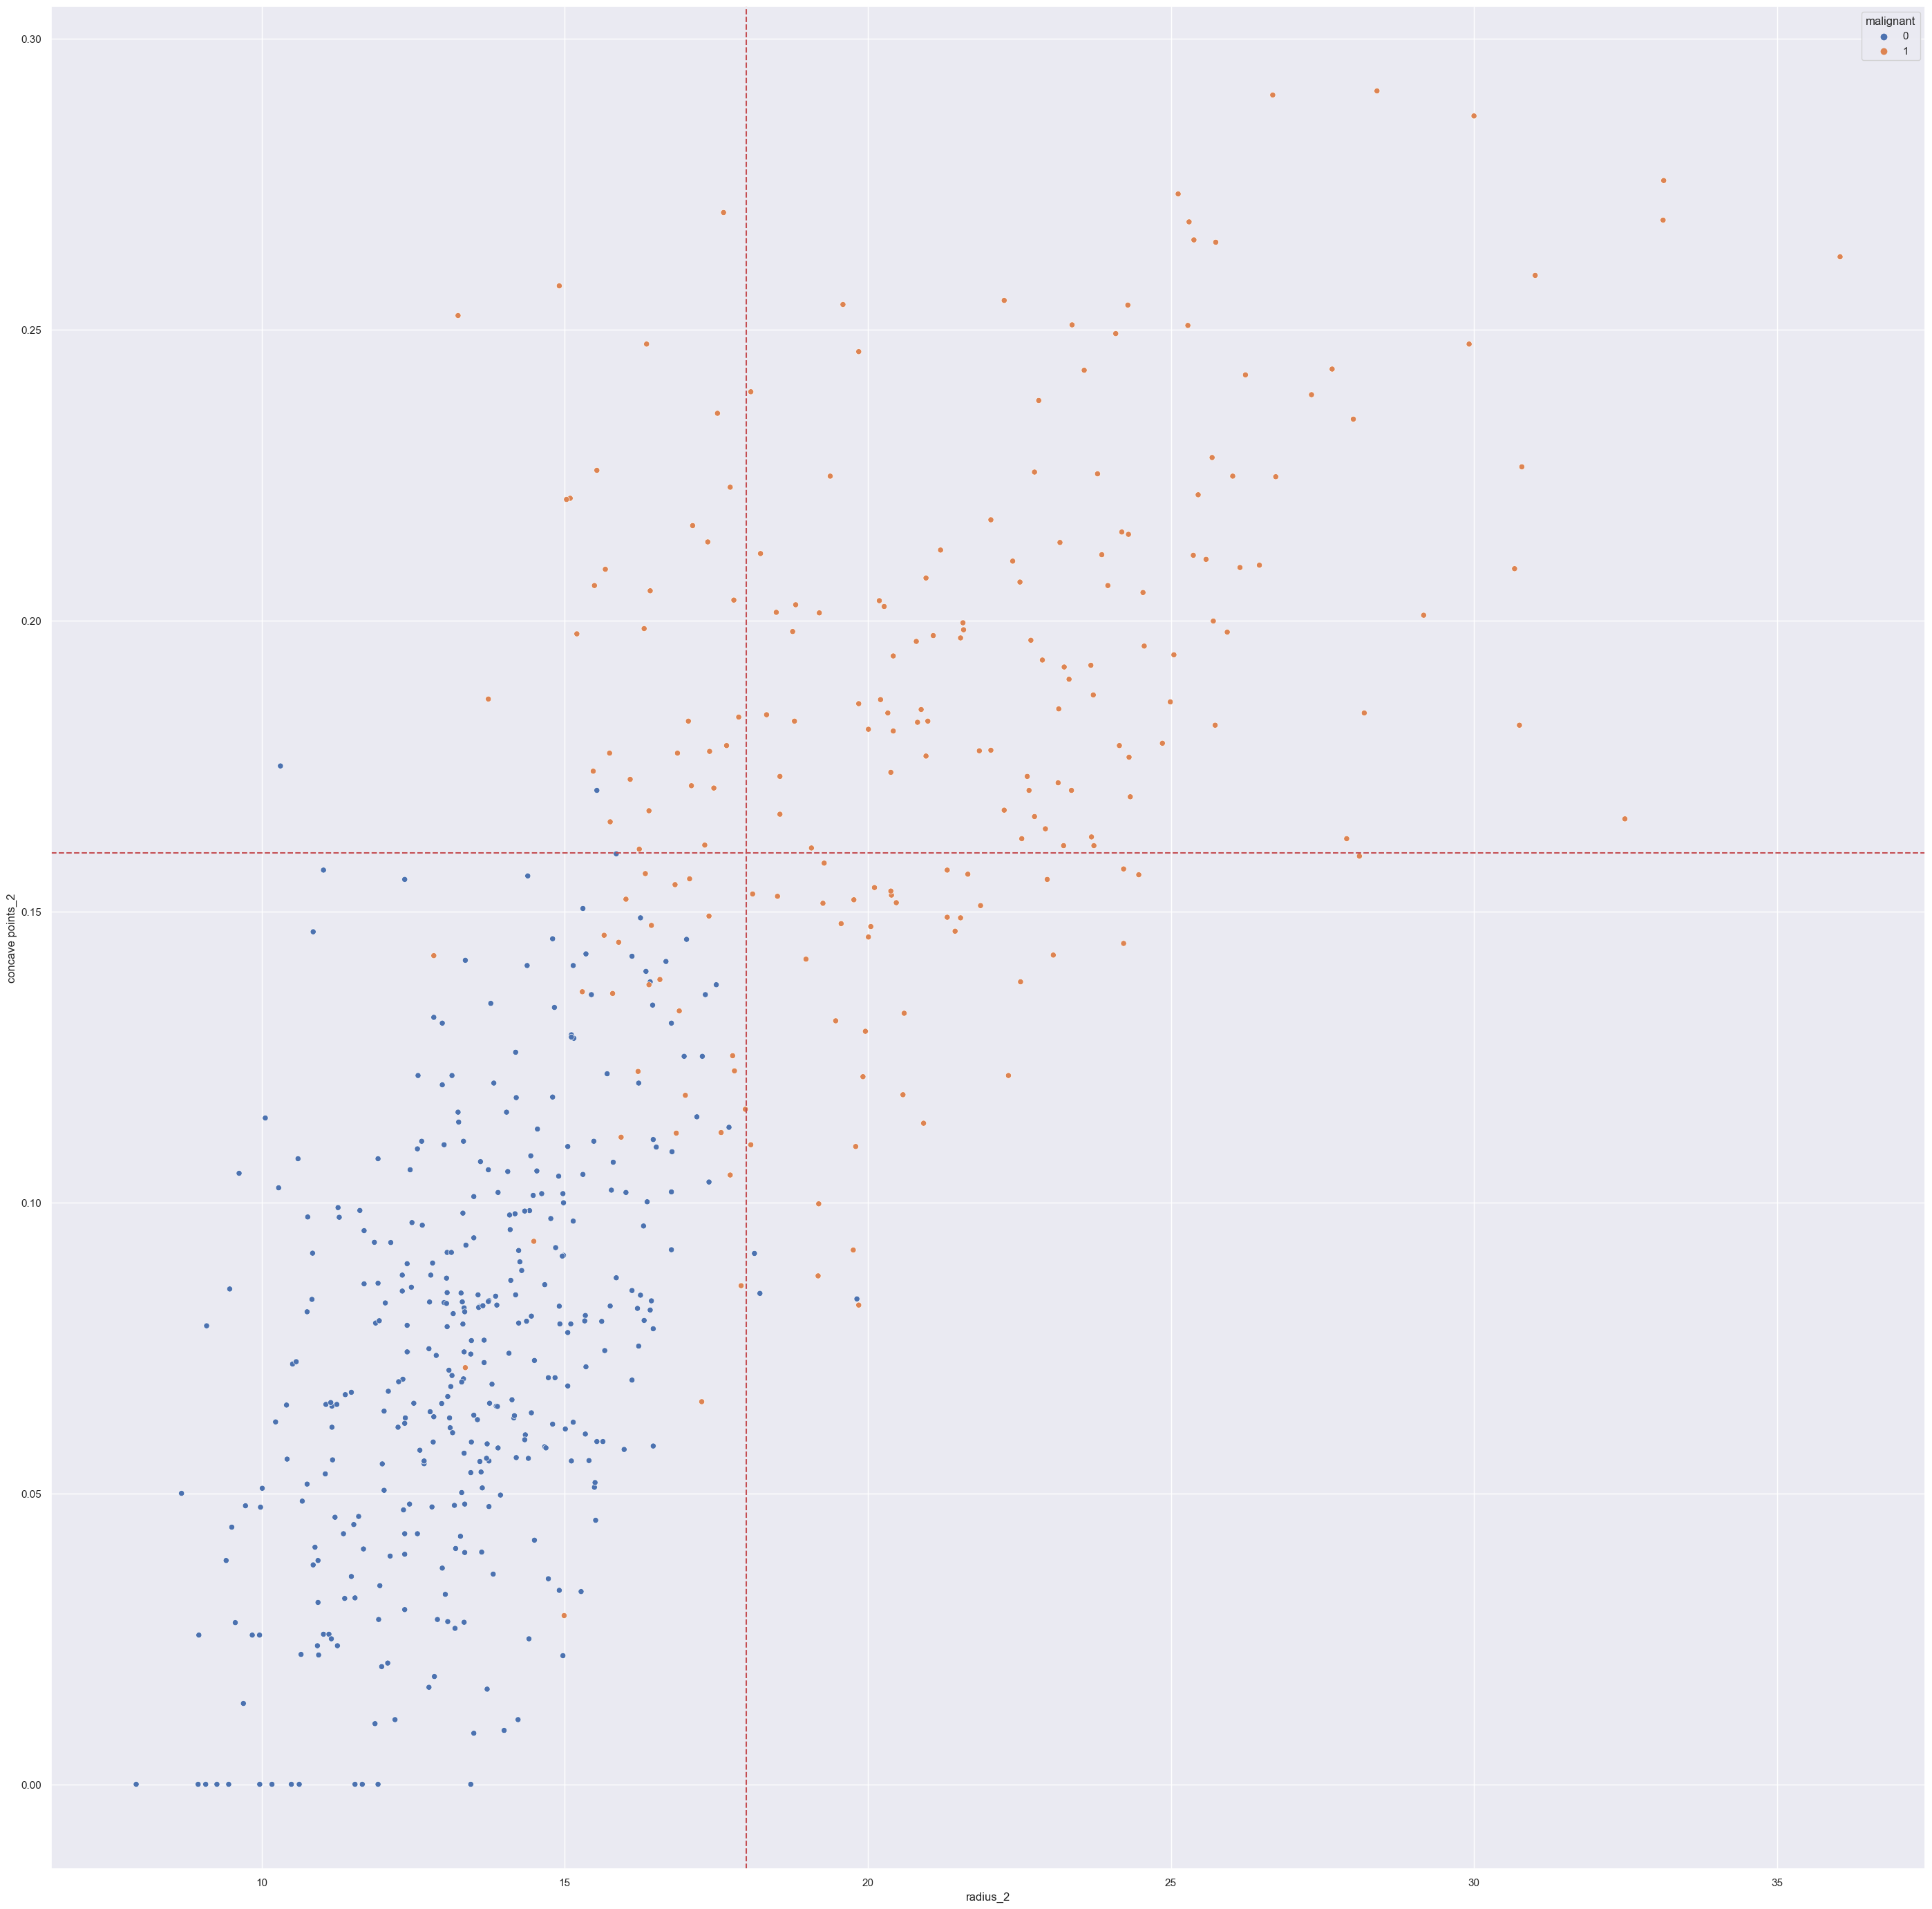

In [13]:
# decision threshold for rule based classifier
import seaborn as sns
radius_plt2 = sns.scatterplot(data=data_drop, x="radius_2", y="concave points_2", hue="malignant")
radius_plt2.axvline(18, color="r", linestyle="--")
radius_plt2.axhline(0.16, color="r", linestyle="--")
fig2 = radius_plt.get_figure()

In [14]:
def Rule_based_classifier(x):
    if x["radius_2"] > 18:
        return 1
    if x["concave points_2"] > 0.16:
        return 1
    if x["perimeter_2"] > 120:
        return 1
    return 0    

In [15]:
def rule_based_score(X, Y):
    results = np.zeros(X.shape[0])
    # prediction for every sample
    for idx, x in X.iterrows():
        pred = Rule_based_classifier(x)
        results[idx] = pred

    # calc accuracy by comparing against actual label
    cnt_correct, cnt_false = 0, 0
    for pred_y, true_y in zip(results, Y):
        if pred_y == true_y:
            cnt_correct += 1
        else:
            cnt_false += 1

    # metrics
    acc = cnt_correct / (cnt_correct + cnt_false)
    f1 = f1_score(Y, results)
    
    return acc, f1

In [16]:
X, y = data_drop.iloc[:,1:], data_drop.iloc[:,0]
rule_acc, rule_f1 = rule_based_score(X, y)
print("Accuracy: %.4f" %rule_acc)
print("F1-score: %.4f" %rule_f1)

Accuracy: 0.9420
F1-score: 0.9177


### Random forest classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [14]:
X = data_drop.iloc[:,1:]
Y = data_drop.iloc[:,0]
Xtrain,  Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=42)
clf_rfc = RandomForestClassifier()
clf_rfc.fit(Xtrain, Ytrain)

score = cross_val_score(clf_rfc, Xtrain, Ytrain).mean()
predictions = clf_rfc.predict(Xtest)
acc = accuracy_score(Ytest, predictions)
print ("Cross validation score: " + str(score))
print ("Accuracy score: " + str(acc))
print(classification_report(Ytest, predictions))

Cross validation score: 0.9648351648351647
Accuracy score: 0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 1.0, 'Random forest classifier confusion matrix')

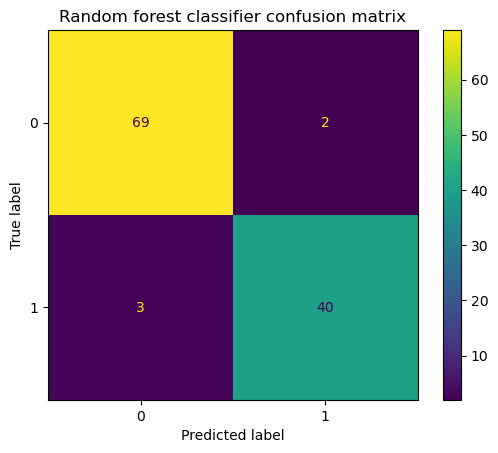

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(Ytest, predictions)).plot()
plt.title("Random forest classifier confusion matrix")

In [20]:
fi = pd.DataFrame({'feature':list(Xtrain.columns),
                             'importance': clf_rfc.feature_importances_}).\
                              sort_values('importance', ascending = False)

In [23]:
fi.head()

,feature,importance
27,concave points_2,0.153929
23,area_2,0.142351
22,perimeter_2,0.112579
7,concave points_0,0.100162
20,radius_2,0.095216


In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
rf_predictions = clf_rfc.predict(Xtest)
rf_probs = clf_rfc.predict_proba(Xtest)[:,1]

In [27]:
roc_value = roc_auc_score(Ytest, rf_probs)
roc_value

0.9959056665574845

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
decision_scores = clf_rfc.predict_proba(Xtest)
Ytest_int = Ytest
fpr, tpr, thres = roc_curve(Ytest_int, decision_scores)
print("AUC: {:.3f}".format(roc_auc_score(Ytest, decision_scores)))

# roc curve
plt.figure(figsize = (9, 9))
plt.plot(fpr, tpr, "b", label = "LinearSVM")
plt.plot([0,1],[0,1], "k--", label = "Random Guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc = "best")
plt.title("ROC curve")
plt.show()

ValueError: y should be a 1d array, got an array of shape (114, 2) instead.

In [43]:
!pip install graphviz

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_tree, y_tree = data_drop.iloc[:,1:], data_drop.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.20, random_state=42)

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)

In [7]:
tree_acc = tree_clf.score(X_test, y_test)
tree_y_pred = [tree_clf.predict([x]) for x in X_test.to_numpy()]
tree_f1 = f1_score(y_test, tree_y_pred)

print(f"Accuracy: {tree_acc}")
print(f"F1-score: {tree_f1}")

Accuracy: 0.9385964912280702
F1-score: 0.9176470588235294


C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklea

In [8]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [56]:
X_tree2, y_tree2 = data_drop.iloc[:,21:], data_drop.iloc[:,0]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tree2, y_tree2, test_size=0.20, random_state=42)

tree_clf2 = tree.DecisionTreeClassifier()
tree_clf2 = tree_clf2.fit(X_train2, y_train2)

tree_acc2 = tree_clf2.score(X_test2, y_test2)
tree_y_pred2 = [tree_clf2.predict([x]) for x in X_test2.to_numpy()]
tree_f1_2 = f1_score(y_test2, tree_y_pred2)

print(f"Accuracy: {tree_acc2}")
print(f"F1-score: {tree_f1_2}")

Accuracy: 0.9210526315789473
F1-score: 0.896551724137931


C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklea

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

In [37]:
decision_scores = tree_clf.decision_function(X_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

In [45]:
from sklearn import tree

[Text(0.6145833333333334, 0.9375, 'X[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3958333333333333, 0.8125, 'X[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.2916666666666667, 0.6875, 'X[13] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.20833333333333334, 0.5625, 'X[24] <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.16666666666666666, 0.4375, 'X[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [257, 2]'),
 Text(0.08333333333333333, 0.3125, 'X[21] <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3125, 'X[21] <= 33.35\ngini = 0.008\nsamples = 252\nvalue = [251, 1]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [237, 0]'),
 Text(0.2916666666666667, 0.1875, 'X[21] <= 33.56\ngini = 0.124\nsamples = 15\nvalue 

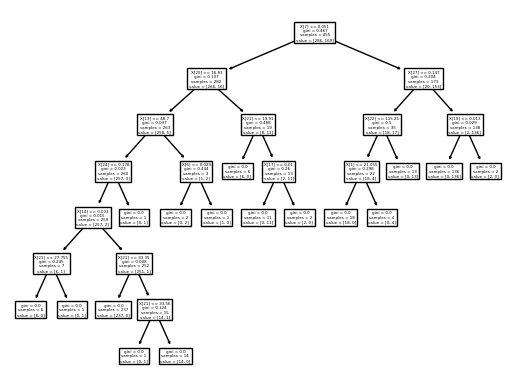

In [46]:
tree.plot_tree(tree_clf)